<a href="https://colab.research.google.com/github/jacksonboy3615/wuthering_waves_google_review_analysis/blob/main/wuthering_waves_interactive_google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import pandasql as ps
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
from google.colab import files

In [21]:
# Upload the sentiment data first into Google Colab

uploaded = files.upload()

Saving wuthering_sentiment_google.csv to wuthering_sentiment_google (1).csv


In [22]:
# Then open the Wuthering Waves' sentiment database on Colab

wuthering_waves_df = pd.read_csv('wuthering_sentiment_google.csv')

In [23]:
wuthering_waves_df.head(5)

,Unnamed: 0,reviews,review_scores,published_date,published_time,versions,review_sentiment_score,review_sentiment_ratings
0,0,hummmm not bad,4,2025-11-25,17:02:00.000000,Version 2,0.4310,Positive
1,1,I've been enjoy the journey for a year. Thank ...,5,2025-11-25,16:59:36.000000,Version 2,0.6908,Positive
2,2,Is this Wuthering Waves or gathering wives?? A...,1,2025-11-25,16:38:07.000000,Version 2,-0.6440,Negative
3,3,game jelek,1,2025-11-25,16:31:59.000000,Version 2,0.0000,Neutral
4,4,beautiful game that i would have liked to expe...,3,2025-11-25,16:21:32.000000,Version 2,-0.4872,Negative


## Sentiment Ratio

In [26]:
# Checking sentiment ratio by creating dataframes for overall as well as per version: Pre-Launch, Version 1.0, and Version 2.0

# Overall

overall_sentiment_ratio_df = pd.DataFrame(wuthering_waves_df.groupby('review_sentiment_ratings')['review_sentiment_score'].count().reset_index().rename(columns={'review_sentiment_ratings': 'Sentiments', 'review_sentiment_score': 'Counts'}))

overall_sentiment_ratio_df['Percentage'] = 100*(overall_sentiment_ratio_df['Counts']/overall_sentiment_ratio_df['Counts'].sum())

overall_sentiment_ratio_df['Versions'] = 'Overall'

overall_sentiment_ratio_df = ps.sqldf("SELECT [Versions], [Sentiments], [Counts], [Percentage] FROM overall_sentiment_ratio_df")


In [27]:
# Versions

version_sentiment_ratio_df = pd.DataFrame(wuthering_waves_df.groupby(['versions', 'review_sentiment_ratings'])['review_sentiment_score'].count().reset_index().rename(columns={'versions': 'Versions', 'review_sentiment_ratings': 'Sentiments', 'review_sentiment_score': 'Counts'}))

version_sentiment_ratio_df['Percentage'] = 100*(version_sentiment_ratio_df['Counts']/version_sentiment_ratio_df.groupby('Versions')['Counts'].transform('sum'))

In [28]:
# Merge them together

sentiment_frames = [overall_sentiment_ratio_df, version_sentiment_ratio_df]

total_sentiment_df = pd.concat(sentiment_frames)

In [29]:
total_sentiment_df

,Versions,Sentiments,Counts,Percentage
0,Overall,Negative,9352,15.318842
1,Overall,Neutral,8616,14.113253
2,Overall,Positive,43081,70.567904
0,Pre-Launch,Negative,238,10.952600
1,Pre-Launch,Neutral,728,33.502071
2,Pre-Launch,Positive,1207,55.545329
3,Version 1,Negative,5682,17.308923
4,Version 1,Neutral,4122,12.556737
5,Version 1,Positive,23023,70.134341
6,Version 2,Negative,3432,13.175170


### Create Sentiment Ratio Pie Chart



In [30]:
def ratio_pie(Version):
    temp = total_sentiment_df[total_sentiment_df["Versions"] == Version]

    colors = sns.color_palette('pastel', len(temp))

    plt.pie(temp["Percentage"],
            labels=temp["Sentiments"],
            colors=colors,
            autopct="%.0f%%")

    plt.title(f"Sentiment Distribution — {Version}")
    plt.show()

In [31]:
interact(ratio_pie, Version=list(total_sentiment_df["Versions"].unique()))

interactive(children=(Dropdown(description='Version', options=('Overall', 'Pre-Launch', 'Version 1', 'Version …

<function __main__.ratio_pie(Version)>

## Score Ratio

In [33]:
# Create dataframe for overall score ratio

overall_score_ratio_df = pd.DataFrame(wuthering_waves_df.groupby('review_scores')['reviews'].count().reset_index().rename(columns={'review_scores':'Review Scores', 'reviews':'Counts'}))

overall_score_ratio_df['Percentage'] = 100*(overall_score_ratio_df['Counts']/overall_score_ratio_df['Counts'].sum())

overall_score_ratio_df['Versions'] = 'Overall'

overall_score_ratio_df = ps.sqldf('SELECT [Versions], [Review Scores], [Counts], [Percentage] FROM overall_score_ratio_df')

In [34]:
# Also for each version

version_score_ratio_df = pd.DataFrame(wuthering_waves_df.groupby(['versions', 'review_scores'])['reviews'].count().reset_index().rename(columns={'versions':'Versions', 'review_scores':'Review Scores', 'reviews':'Counts'}))

version_score_ratio_df['Percentage'] = 100*(version_score_ratio_df['Counts']/version_score_ratio_df.groupby('Versions')['Counts'].transform('sum'))

In [36]:
# Merge them into one dataframe

score_frames = [overall_score_ratio_df, version_score_ratio_df]

total_score_df = pd.concat(score_frames)

In [38]:
total_score_df.head(10)

,Versions,Review Scores,Counts,Percentage
0,Overall,1,8773,14.371365
1,Overall,2,2874,4.708002
2,Overall,3,3900,6.388730
3,Overall,4,5198,8.515030
4,Overall,5,40300,66.016873
0,Pre-Launch,1,207,9.530387
1,Pre-Launch,2,45,2.071823
2,Pre-Launch,3,54,2.486188
3,Pre-Launch,4,66,3.038674
4,Pre-Launch,5,1800,82.872928


### Create Score Ratio Pie Chart


In [39]:
def score_bar(Version):
    temp_score = total_score_df[total_score_df["Versions"] == Version]
    # temp_score = temp_score[temp_score["Review Scores"] == Score]

    ax = sns.barplot(x = temp_score["Counts"],
                y = temp_score["Review Scores"],
                orient="y",
                # hue=len(temp_score["Counts"]),
                width=.7)

    bars = ax.containers[0]

    ax.bar_label(bars, labels=[f"{p:.1f}%" for p in temp_score["Percentage"]], label_type="edge")
    ax.bar_label(bars, labels=[f"{c:.0f}" for c in temp_score["Counts"]], label_type="center")

    plt.title(f"Score Distribution — {Version}")
    plt.show()

In [40]:
interact(score_bar, Version=list(total_score_df["Versions"].unique()))

interactive(children=(Dropdown(description='Version', options=('Overall', 'Pre-Launch', 'Version 1', 'Version …

<function __main__.score_bar(Version)>

## Average Scores by Version

In [44]:
# Create dataframe grouping by avg. scores by version

average_scores_versions = pd.DataFrame(wuthering_waves_df.groupby('versions')['review_scores'].mean().reset_index().rename(columns={'versions':'Versions', 'review_scores':'Average Score'}))

[Text(0, 0, '4.5'), Text(0, 0, '3.9'), Text(0, 0, '4.2')]

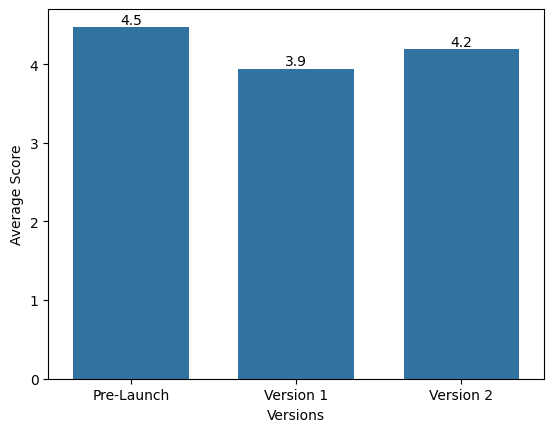

In [45]:
# Average Score Trend by Version

average_scores_versions

ax = sns.barplot(x = average_scores_versions["Versions"],
                 y = average_scores_versions["Average Score"],
                 orient="x",
                 width=.7)

bars = ax.containers[0]

ax.bar_label(bars, labels=[f"{s:.1f}" for s in average_scores_versions["Average Score"]], label_type="edge")

## Word Clouds by Version

In [57]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
from nltk.corpus import stopwords

### I. Word Cloud - Overall

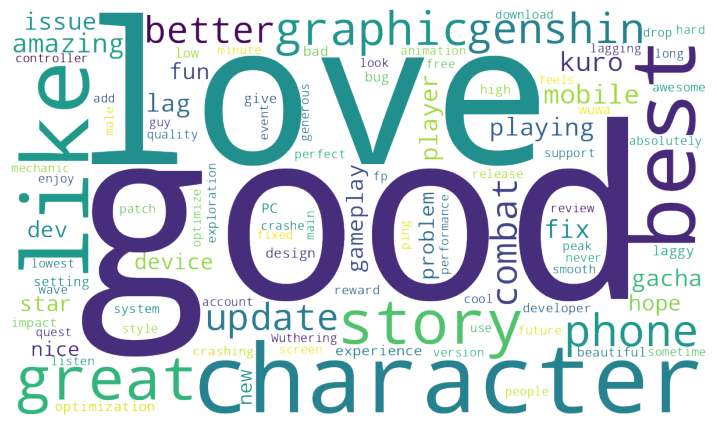

In [67]:
wuthering_waves_df['reviews'] = wuthering_waves_df['reviews'].replace(np.nan, '', regex=True)

reviews = ' '.join(wuthering_waves_df['reviews'])

stop = set(stopwords.words('english'))

custom_stopwords = ["even", 'game', 'thing', 'first', 'still', 'would', 'time', 'get', 'want', 'keep', 'one', 'though',
                    'try', "can't", 'bit', 'please', 'world', 'games', 'many', 'open', 'day', 'also', 'alway', 'well',
                    'lot', 'could', 'since', 'way', 'work', 'got', 'u', 'actually', 'really', 'played', 'every', 'much',
                    'ever', 'always', 'run', 'play', 'pretty', 'getting', 'us', 'im', 'already', 'back', 'start', 'make',
                    'say', 'made', 'especially', 'need', 'think', 'everything', 'far', 'know', 'end', 'overall', 'keeps',
                    'see', 'feel', 'thank', 'pls', 'take', 'needs', 'pull', 'without']

extended_stopwords = stop.union(custom_stopwords)

overall_wordcloud = WordCloud(width=1200, height=700, max_words=100, stopwords=extended_stopwords , background_color="rgba(255, 255, 255, 0)", mode="RGBA", collocations=False).generate(reviews)

overall_wordcloud.words_

# Display the generated image:
plt.figure(figsize=(9,9))
plt.imshow(overall_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### II. Word Cloud - Pre-Launch

In [60]:
prelaunch_word_df = ps.sqldf("SELECT * FROM wuthering_waves_df WHERE [versions] == 'Pre-Launch'")

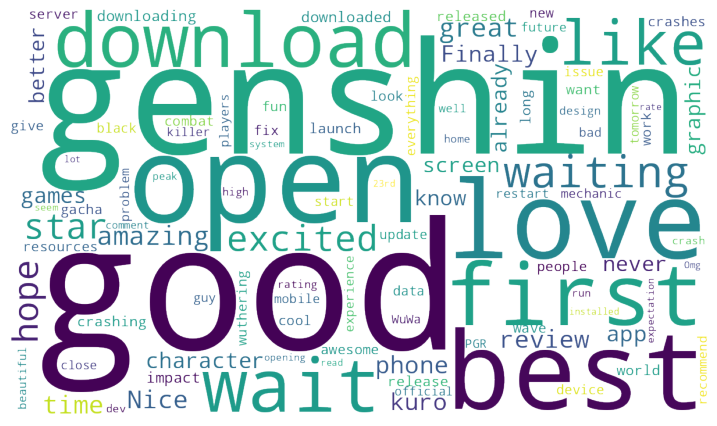

In [66]:
reviews_pre = ' '.join(prelaunch_word_df['reviews'])

stop = set(stopwords.words('english'))

custom_stopwords = ["gonna", 'looking', 'gameplay', 'tho', 'see', 'gb', 'come', 'yet', 'could', 'im',
                    'go', 'may', 'back', 'tried', 'also', 'still', 'playing', 'please', 'even', 'always',
                    'thing', 'really', 'much', 'make', 'day', "can't", 'thank', 'try', 'player', 'u',
                    'keep', 'going', 'need', 'got', 'get', 'pre', 'would', 'let', 'ever', 'cant', 'say',
                    'yes', 'year', 'actually', 'since', 'one', 'play','game', 'played', 'think', 'absolutely',
                    'days', 'keeps', 'far', 'many', 'every']

extended_stopwords = stop.union(custom_stopwords)

prelaunch_wordcloud = WordCloud(width=1200, height=700, max_words=100, stopwords=extended_stopwords , background_color="rgba(255, 255, 255, 0)", mode="RGBA", collocations=False).generate(reviews_pre)

prelaunch_wordcloud.words_

# Display the generated image:
plt.figure(figsize=(9,9))
plt.imshow(prelaunch_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### III. Word Cloud - Version 1.0

In [62]:
version1_word_df = ps.sqldf("SELECT * FROM wuthering_waves_df WHERE [versions] == 'Version 1'")

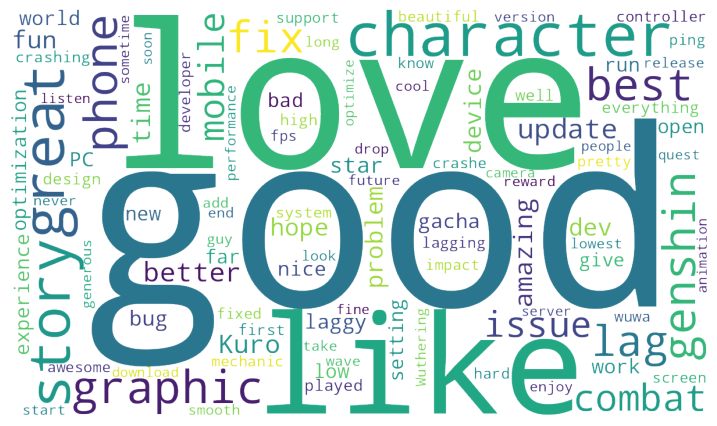

In [63]:
reviews_ver1 = ' '.join(version1_word_df['reviews'])

stop = set(stopwords.words('english'))

custom_stopwords = ["gonna", 'looking', 'gameplay', 'tho', 'see', 'gb', 'come', 'yet', 'could', 'im',
                    'go', 'may', 'back', 'tried', 'also', 'still', 'playing', 'please', 'even', 'always',
                    'thing', 'really', 'much', 'make', 'day', "can't", 'thank', 'try', 'player', 'u',
                    'keep', 'going', 'need', 'got', 'get', 'pre', 'would', 'let', 'ever', 'cant', 'say',
                    'yes', 'year', 'actually', 'since', 'one', 'play', 'game', 'want', 'feel', 'keeps',
                    'games', 'overall', 'bit', 'though', 'lot', 'players', 'needs', 'think', 'us', 'way',
                    'already', 'every', 'minute', 'getting', 'especially', 'many', 'pls']

extended_stopwords = stop.union(custom_stopwords)

version1_wordcloud = WordCloud(width=1200, height=700, max_words=100, stopwords=extended_stopwords , background_color="rgba(255, 255, 255, 0)", mode="RGBA", collocations=False).generate(reviews_ver1)

version1_wordcloud.words_

# Display the generated image:
plt.figure(figsize=(9,9))
plt.imshow(version1_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### IV. Word Cloud - Version 2.0

In [64]:
version2_word_df = ps.sqldf("SELECT * FROM wuthering_waves_df WHERE [versions] == 'Version 2'")

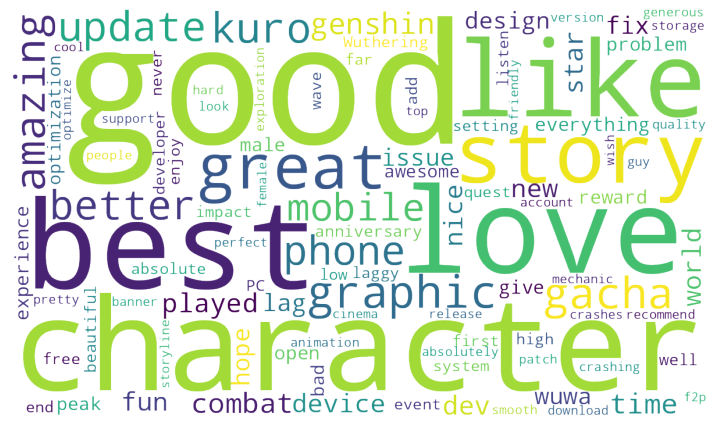

In [65]:
reviews_ver2 = ' '.join(version2_word_df['reviews'])

stop = set(stopwords.words('english'))

custom_stopwords = ["gonna", 'looking', 'gameplay', 'tho', 'see', 'gb', 'come', 'yet', 'could', 'im',
                    'go', 'may', 'back', 'tried', 'also', 'still', 'playing', 'please', 'even', 'always',
                    'thing', 'really', 'much', 'make', 'day', "can't", 'thank', 'try', 'player', 'u',
                    'keep', 'going', 'need', 'got', 'get', 'pre', 'would', 'let', 'ever', 'cant', 'say',
                    'yes', 'year', 'actually', 'since', 'one', 'play', 'game', 'want', 'feel', 'keeps',
                    'games', 'overall', 'bit', 'though', 'lot', 'players', 'needs', 'think', 'us', 'way',
                    'already', 'every', 'minute', 'getting', 'especially', 'many', 'pls', 'run', 'without',
                    'know', 'making', 'feels', 'main', 'pull', 'take', 'work', 'made']

extended_stopwords = stop.union(custom_stopwords)

version2_wordcloud = WordCloud(width=1200, height=700, max_words=100, stopwords=extended_stopwords , background_color="rgba(255, 255, 255, 0)", mode="RGBA", collocations=False).generate(reviews_ver2)

version2_wordcloud.words_

# Display the generated image:
plt.figure(figsize=(9,9))
plt.imshow(version2_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Keywords (Excluding Stopwords)

In [68]:
# Top 10 Keywords - Overall

overall_word_frequency = overall_wordcloud.words_

overall_frequency = pd.DataFrame(list(overall_word_frequency.items()), columns=['Words', 'Frequency'])

overall_top10 = overall_frequency.sort_values('Frequency', ascending=False).head(10)

overall_top10['Versions'] = 'Overall'

In [69]:
# Keywords - Pre Launch

pre_word_frequency = prelaunch_wordcloud.words_

pre_frequency = pd.DataFrame(list(pre_word_frequency.items()), columns=['Words', 'Frequency'])

pre_top10 = pre_frequency.sort_values('Frequency', ascending=False).head(10)

pre_top10['Versions'] = 'Pre-Launch'

In [70]:
# Keywords - Version 1.0

ver1_word_frequency = version1_wordcloud.words_

ver1_frequency = pd.DataFrame(list(ver1_word_frequency.items()), columns=['Words', 'Frequency'])

ver1_top10 = ver1_frequency.sort_values('Frequency', ascending=False).head(10)

ver1_top10['Versions'] = 'Version 1.0'

In [71]:
# Keywords - Version 2.0

ver2_word_frequency = version2_wordcloud.words_

ver2_frequency = pd.DataFrame(list(ver2_word_frequency.items()), columns=['Words', 'Frequency'])

ver2_top10 = ver2_frequency.sort_values('Frequency', ascending=False).head(10)

ver2_top10['Versions'] = 'Version 2.0'

In [72]:
# Merge them for interactive dropdown

word_frame_list = [overall_top10, pre_top10, ver1_top10, ver2_top10]

total_word_frequency = pd.concat(word_frame_list)

In [73]:
total_word_frequency.head(5)

,Words,Frequency,Versions
0,good,1.000000,Overall
1,love,0.660893,Overall
2,character,0.652390,Overall
3,like,0.612235,Overall
4,best,0.561058,Overall


In [74]:
def top10_word_bar(Version):
    temp_word = total_word_frequency[total_word_frequency["Versions"] == Version]

    ax = sns.barplot(x = temp_word["Frequency"],
                y = temp_word["Words"],
                orient="y",
                # hue=len(temp_score["Counts"]),
                width=.7)

    bars = ax.containers[0]

    ax.bar_label(bars, labels=[f"{f:.02f}" for f in temp_word["Frequency"]], label_type="edge")

    plt.title(f"Top 10 Keywords Without Stopwords — {Version}")
    plt.show()

In [75]:
interact(top10_word_bar, Version = list(total_word_frequency["Versions"].unique()))

interactive(children=(Dropdown(description='Version', options=('Overall', 'Pre-Launch', 'Version 1.0', 'Versio…

<function __main__.top10_word_bar(Version)>